**Vamos experimentar agora o algoritmo Decision Tree?**

In [14]:
#!pip -q install yellowbrick
#!pip install --upgrade scikit-learn

In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.tree import DecisionTreeClassifier

In [16]:
import pickle
with open('content/sample_data/restaurante.pkl', 'rb') as f:
  X_treino, X_teste, y_treino, y_teste = pickle.load(f)

In [17]:
modelo = DecisionTreeClassifier(criterion='entropy')
Y = modelo.fit(X_treino, y_treino)



> **Vamos testar o modelo?**



In [18]:
previsoes = modelo.predict(X_teste)

In [19]:
previsoes

array(['Nao', 'Sim', 'Sim'], dtype=object)



> **Será se o modelo acertou?**



In [20]:
y_teste

10    Nao
9     Nao
0     Sim
Name: Conclusao, dtype: object

In [21]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy_score(y_teste,previsoes)

0.6666666666666666

In [22]:
import setuptools._distutils as _distutils
from yellowbrick.classifier import ConfusionMatrix
confusion_matrix(y_teste, previsoes)

array([[1, 1],
       [0, 1]])

/home/gabriel/Documentos/Projetos_git/Exercicios-IA-PUC/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


0.6666666666666666

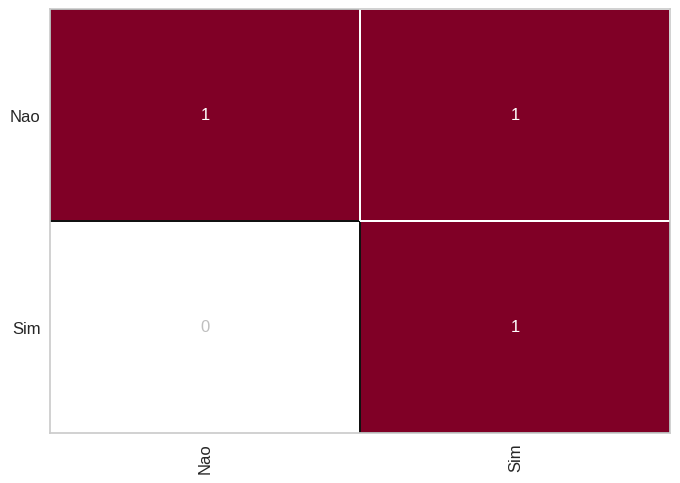

In [23]:
cm = ConfusionMatrix(modelo)
cm.fit(X_treino, y_treino)
cm.score(X_teste, y_teste)

In [24]:
print(classification_report(y_teste, previsoes))

              precision    recall  f1-score   support

         Nao       1.00      0.50      0.67         2
         Sim       0.50      1.00      0.67         1

    accuracy                           0.67         3
   macro avg       0.75      0.75      0.67         3
weighted avg       0.83      0.67      0.67         3



['Nao' 'Sim']


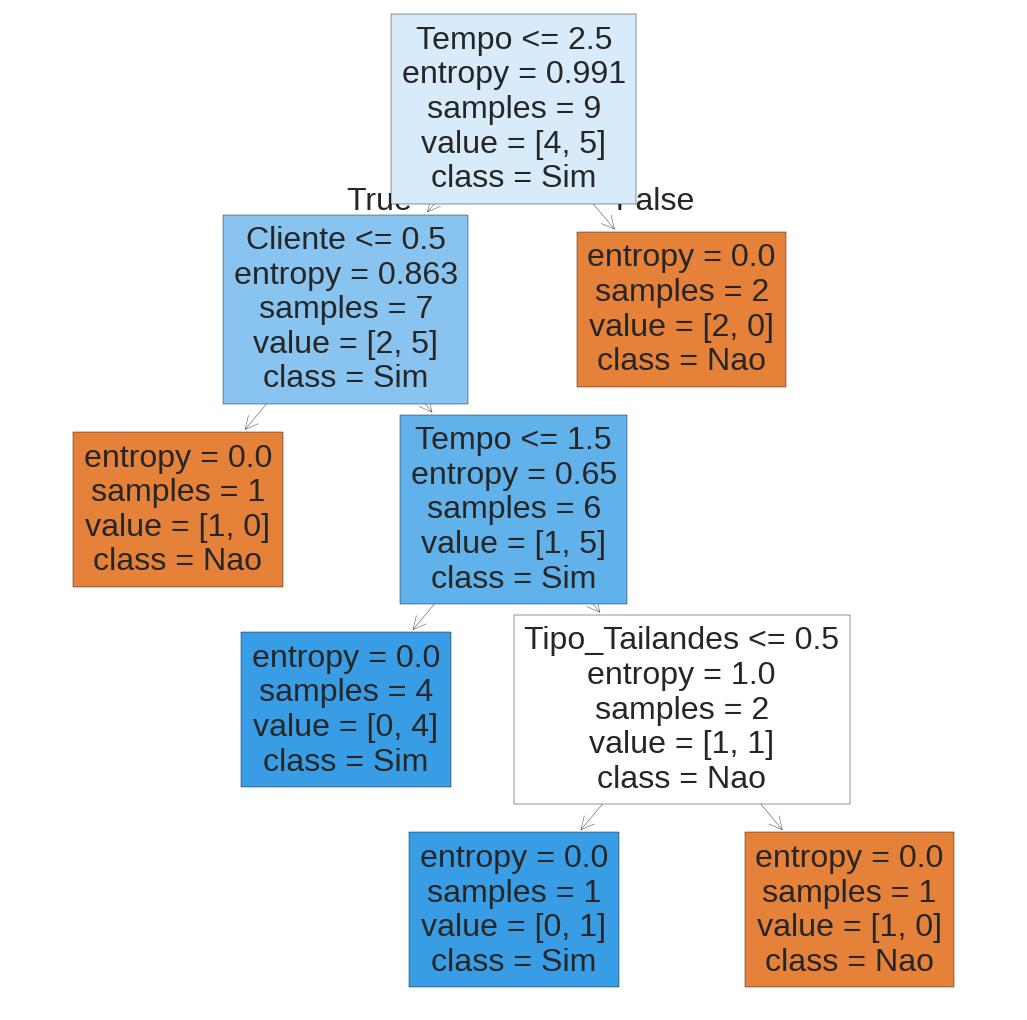

In [25]:
from sklearn import tree
previsores = X_treino.columns
figura, eixos = plt.subplots(nrows=1, ncols=1, figsize=(13,13))
print(modelo.classes_)
tree.plot_tree(modelo, feature_names=previsores, class_names = modelo.classes_, filled=True);